In [1]:
import numpy as np;

from google.colab import drive;
drive.mount('/content/drive');

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [82]:
s10uF1K = np.loadtxt('/content/drive/My Drive/4BL/RC_10uF_1K0.csv')
s10uF100 = np.loadtxt('/content/drive/My Drive/4BL/RC_10uF_1000.csv')
s100uF100 = np.loadtxt('/content/drive/My Drive/4BL/RC_100uF_1000.csv')

import matplotlib.pyplot as plt


(16385.0, 16655.0)

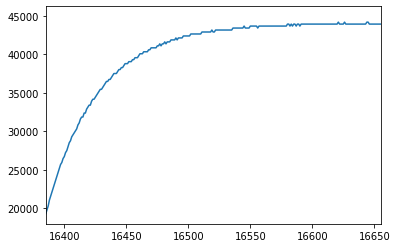

In [75]:
plt.plot(s10uF1K)
plt.xlim([16385,16655])

(10458.0, 10650.0)

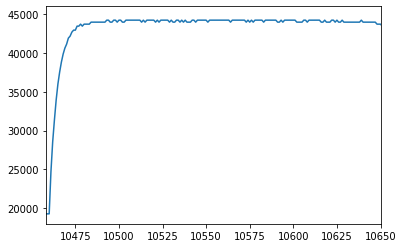

In [63]:
plt.plot(s10uF100)
plt.xlim([10458,10650])

(15480.0, 15770.0)

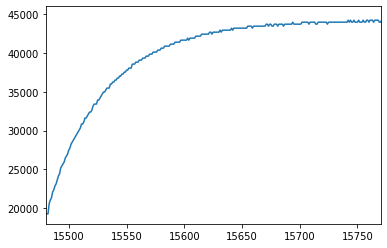

In [81]:
plt.plot(s100uF100)
plt.xlim([15480,15770])

In [91]:
#Trim dat
s10uF1KTrim = s10uF1K[16385:16655]
s10uF100Trim = s10uF100[10458:10650]
s100uF100Trim = s100uF100[15480:15770]

#Remove DC offset

s10uF1KTrim = s10uF1KTrim-min(s10uF1KTrim)
s10uF100Trim = s10uF100Trim-min(s10uF100Trim)
s100uF100Trim = s100uF100Trim-min(s100uF100Trim)

# Normalize
s10uF1KTrim = s10uF1KTrim/max(s10uF1KTrim)
s10uF100Trim = s10uF100Trim/max(s10uF100Trim)
s100uF100Trim = s100uF100Trim/max(s100uF100Trim)

s_rate = 1/4400;

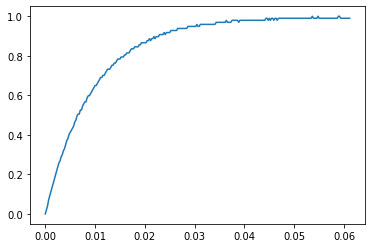

In [92]:
#Plot 1

x_axis = np.arange(len(s10uF1KTrim)) * s_rate;
plt.plot(x_axis, s10uF1KTrim)

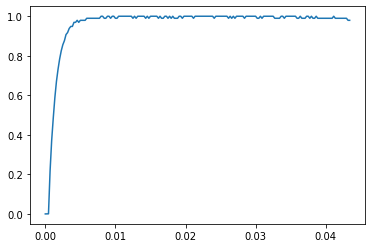

In [93]:
#Plot 2

x_axis = np.arange(len(s10uF100Trim)) * s_rate;
plt.plot(x_axis, s10uF100Trim)

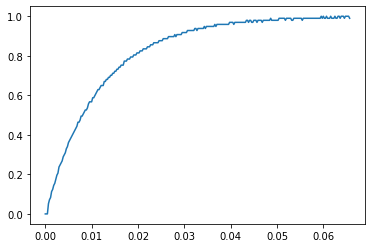

In [94]:
#Plot 3

x_axis = np.arange(len(s100uF100Trim)) * s_rate;
plt.plot(x_axis, s100uF100Trim)

In [ ]:
# Least Squares with First Data Set

In [113]:
def exponential(x, parameters):
  '''
  Plots a exponential
  
  Inputs:
    x: a coordinate
    parameters: [A, B]
  '''
  A = parameters[0]
  B = parameters[1]
  y = A*(1-np.exp(B*x))
  return y

def get_residuals(parameters, data, x):
  residuals = np.abs(data - exponential(x, parameters))
  return -residuals

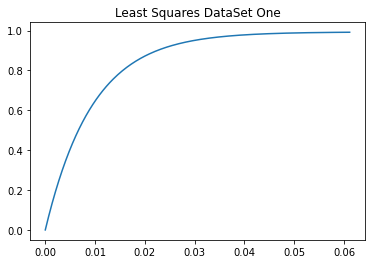

In [116]:
from scipy.optimize import least_squares

# fit Line
guess_param = [1, 1]
x_1 = np.arange(len(s10uF1KTrim)) * s_rate;
res_lsq = least_squares(get_residuals, guess_param, args = (s10uF1KTrim,x_1))
parameters = res_lsq['x']

set1_fit = exponential(x_1, parameters)
plt.plot(x_1, set1_fit)
plt.title("Least Squares Data Set One");


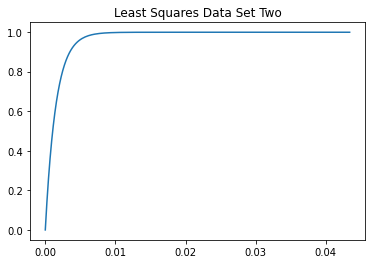

In [117]:
# fit Line
guess_param = [1, 1]
x_2 = np.arange(len(s10uF100Trim)) * s_rate;
res_lsq = least_squares(get_residuals, guess_param, args = (s10uF100Trim,x_2))
parameters = res_lsq['x']

set2_fit = exponential(x_2, parameters)
plt.plot(x_2, set2_fit)
plt.title("Least Squares Data Set Two");

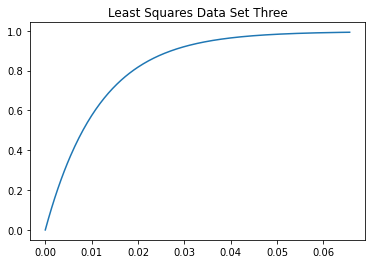

In [118]:
# fit Line
guess_param = [1, 1]
x_3 = np.arange(len(s100uF100Trim)) * s_rate;
res_lsq = least_squares(get_residuals, guess_param, args = (s100uF100Trim,x_3))
parameters = res_lsq['x']

set3_fit = exponential(x_3, parameters)
plt.plot(x_3, set3_fit)
plt.title("Least Squares Data Set Three");

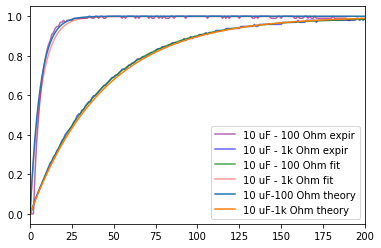

In [179]:
# First Final Plot

#Plots
plt.plot(s10uF100Trim, alpha = 0.6, color = 'purple', label = "10 uF - 100 Ohm expir")
plt.plot(s10uF1KTrim, alpha = 0.6, color = 'blue', label = "10 uF - 1k Ohm expir")

#Least Squares
plt.plot(set1_fit, alpha = 0.7, color= 'green', label = "10 uF - 100 Ohm fit")
plt.plot(set2_fit, alpha = 0.4, color= 'red', label = "10 uF - 1k Ohm fit")

#Theoretical Data
v = 1
r1 = 100
r2 = 1000
r3 = 10000
t1 = np.linspace(0,1,4400)
c1 = 1 * 10**(-6)
c2 = 10 * 10**(-6)
c3 = 100 * 10**(-6)


theor10uF100 = v*(1-np.exp((-1/(r1*c2))*t1))
theor10uF1k = v*(1-np.exp((-1/(r2*c2))*t1))

plt.plot(theor100uF100, label = "10 uF-100 Ohm theory");
plt.plot(theor10uF1k, label = "10 uF-1k Ohm theory");

plt.xlim([0,200]);
plt.legend();



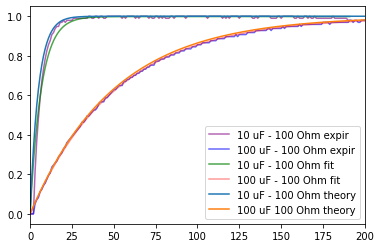

In [191]:
# First Final Plot

#Plots
plt.plot(s10uF100Trim, alpha = 0.6, color = 'purple', label = "10 uF - 100 Ohm expir")
plt.plot(s100uF100Trim, alpha = 0.6, color = 'blue', label = "100 uF - 100 Ohm expir")

#Least Squares
plt.plot(set2_fit, alpha = 0.7, color= 'green', label = "10 uF - 100 Ohm fit")
plt.plot(set3_fit, alpha = 0.4, color= 'red', label = "100 uF - 100 Ohm fit")

#Theoretical Data
v = 1
r1 = 100
r2 = 1000
r3 = 10000
t1 = np.linspace(0,1,5000)
c1 = 1 * 10**(-6)
c2 = 10 * 10**(-6)
c3 = 100 * 10**(-6)


theor10uF100 = v*(1-np.exp((-1/(r1*c2))*t1))
theor100uF100 = v*(1-np.exp((-1/(r1*c3))*t1))

plt.plot(theor10uF100, label = "10 uF - 100 Ohm theory");
plt.plot(theor100uF100, label = "100 uF 100 Ohm theory");

plt.xlim([0,200]);
plt.legend();